In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import classification_report, plot_precision_recall_curve
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import pydotplus
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
import graphviz
from graphviz import Source
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [7]:
root_path = "drive/MyDrive/ML_project"
orig = root_path + "/bases_originales"
clean = root_path + "/bases limpias"
plots = root_path + "/plots"
GIS = orig + "/GIS"

In [8]:
data_base = pd.read_pickle(clean + "/MASTER_ENDIREH2016_coded_final.pkl")

In [9]:
data_base['suffers_violence'] = (data_base['tot_violent'] > 0)

# 1. Logistic Regression

## Load data

In [19]:
variables = [ 'P2_5', 'P2_6', 'NIV_0.0', 'NIV_10.0', 'NIV_2.0', 'NIV_3.0', 'NIV_4.0', 'NIV_5.0',
            'ocup_simple_m_0.0', 'ocup_simple_m_1.0', 'ocup_simple_m_2.0', 'ocup_simple_m_3.0', 'ocup_simple_m_4.0', 'ocup_simple_m_5.0',
            'ocup_simple_m_6.0', 'P2_10_1.0', 'P2_10_2.0', 'P2_10_3.0', 'P2_10_8.0', 
            'P4_1', 'P4_3', 'P4_8_1', 'P4_8_2', 'P4_8_3', 'P4_8_4', 'PAREN_1', 'PAREN_2', 'PAREN_3', 'PAREN_4', 'PAREN_5', 'PAREN_6', 'PAREN_7', 'PAREN_8', 'PAREN_9', 'P2_9_1.0', 'P2_9_2.0',
            'P4_8_5', 'P4_8_6', 'P4_8_7', 'P4_8_8', 'P4_11',  'P1_4_1', 'P1_4_2', 'P1_4_3', 'P1_4_4', 'P1_4_5', 
            'P1_4_6', 'P1_4_7', 'P1_4_8', 'P1_4_9', 'P1_8', 'P15_1_1', 'P15_1_2', 'P15_1_3', 'P15_1_4', 'P15_1_5', 'P15_1_6', 
            'P15_1_7', 'P15_1_8', 'P15_1_9', 'P16_1_1', 'P16_1_2', 'P16_1_3', 'P16_1_4', 'P16_1_5', 'P16_1_6', 'P16_2_1', 'P16_2_2', 'P16_2_3', 
            'P16_2_4', 'P16_2_5', 'P16_2_6', 'asset_1_0.0', 'asset_1_1.0', 'asset_1_2.0', 'asset_1_3.0', 'asset_2_0.0', 'asset_2_1.0', 'asset_2_2.0',
            'asset_2_3.0', 'asset_3_0.0', 'asset_3_1.0', 'asset_3_2.0', 'asset_3_3.0', 'asset_4_0.0', 'asset_4_1.0', 'asset_4_2.0', 'asset_4_3.0',
            'asset_5_0.0', 'asset_5_1.0', 'asset_5_2.0', 'asset_5_3.0', 'asset_6_0.0', 'asset_6_1.0', 'asset_6_2.0', 'asset_6_3.0', 'asset_7_0.0', 'asset_7_1.0',
            'asset_7_2.0', 'asset_7_3.0', 'P1_1_1', 'P1_1_2', 'P1_1_3', 'P1_5_1', 'P1_5_2', 'P1_5_3', 'P1_5_4', 'P1_5_5', 'P1_5_6', 'P1_6_1', 'P1_6_2', 'P1_6_3',
            'P1_6_4', 'P1_6_5', 'P17_1_1_1_1', 'P17_1_1_1_10', 'P17_1_1_1_11', 'P17_1_1_1_12', 'P17_1_1_1_13', 'P17_1_1_1_14', 'P17_1_1_1_15', 'P17_1_1_1_2',
            'P17_1_1_1_3', 'P17_1_1_1_4', 'P17_1_1_1_5', 'P17_1_1_1_6', 'P17_1_1_1_7', 'P17_1_1_1_8', 'P17_1_1_1_9', 'P17_1_2_1_1', 'P17_1_2_1_10', 'P17_1_2_1_11', 
            'P17_1_2_1_12', 'P17_1_2_1_13', 'P17_1_2_1_14', 'P17_1_2_1_15', 'P17_1_2_1_2', 'P17_1_2_1_3', 'P17_1_2_1_4', 'P17_1_2_1_5', 'P17_1_2_1_6', 'P17_1_2_1_7',
            'P17_1_2_1_8', 'P17_1_2_1_9', 'P17_1_3_1_1', 'P17_1_3_1_10', 'P17_1_3_1_11', 'P17_1_3_1_12', 'P17_1_3_1_13', 'P17_1_3_1_14', 'P17_1_3_1_15',
            'P17_1_3_1_2', 'P17_1_3_1_3', 'P17_1_3_1_4', 'P17_1_3_1_5', 'P17_1_3_1_6', 'P17_1_3_1_7', 'P17_1_3_1_8','P17_1_3_1_9', 'P17_1_4_1_1', 'P17_1_4_1_10', 
            'P17_1_4_1_11', 'P17_1_4_1_12', 'P17_1_4_1_13', 'P17_1_4_1_14', 'P17_1_4_1_15', 'P17_1_4_1_2', 'P17_1_4_1_3', 'P17_1_4_1_4', 'P17_1_4_1_5', 'P17_1_4_1_6',
            'P17_1_4_1_7', 'P17_1_4_1_8', 'P17_1_4_1_9', 'P17_1_5_1_1', 'P17_1_5_1_10', 'P17_1_5_1_11', 'P17_1_5_1_12', 'P17_1_5_1_13', 'P17_1_5_1_14', 'P17_1_5_1_15',
            'P17_1_5_1_2', 'P17_1_5_1_3', 'P17_1_5_1_4', 'P17_1_5_1_5', 'P17_1_5_1_6', 'P17_1_5_1_7', 'P17_1_5_1_8', 'P17_1_5_1_9', 'P17_1_6_1_1', 'P17_1_6_1_10',
            'P17_1_6_1_11', 'P17_1_6_1_12', 'P17_1_6_1_13', 'P17_1_6_1_14', 'P17_1_6_1_15', 'P17_1_6_1_2', 'P17_1_6_1_3', 'P17_1_6_1_4', 'P17_1_6_1_5','P17_1_6_1_6',
            'P17_1_6_1_7', 'P17_1_6_1_8', 'P17_1_6_1_9', 'P17_1_7_1_1', 'P17_1_7_1_10', 'P17_1_7_1_11', 'P17_1_7_1_12', 'P17_1_7_1_13', 'P17_1_7_1_14', 'P17_1_7_1_15',
            'P17_1_7_1_2','P17_1_7_1_3', 'P17_1_7_1_4', 'P17_1_7_1_5', 'P17_1_7_1_6', 'P17_1_7_1_7', 'P17_1_7_1_8', 'P17_1_7_1_9', 'P4_6_AB_1.0', 'P4_6_AB_2.0', 'P4_6_AB_3.0',
             'P16_3_1_1_1', 'P16_3_1_1_2', 'P16_3_1_1_3', 'P16_3_1_1_4', 'P16_3_1_1_5', 'P16_3_1_1_6', 'P16_3_2_1_1', 'P16_3_2_1_2', 'P16_3_2_1_3', 'P2_11_1.0', 'P2_11_2.0',
            'P16_3_2_1_4', 'P16_3_2_1_5', 'P16_3_2_1_6', 'P16_3_3_1_1', 'P16_3_3_1_2', 'P16_3_3_1_3', 'P16_3_3_1_4', 'P16_3_3_1_5', 'P16_3_3_1_6', 'P16_3_4_1_1',
            'P16_3_4_1_2', 'P16_3_4_1_3', 'P16_3_4_1_4', 'P16_3_4_1_5', 'P16_3_4_1_6', 'P16_3_5_1_1', 'P16_3_5_1_2', 'P16_3_5_1_3', 'P16_3_5_1_4', 'P16_3_5_1_5',
            'P16_3_5_1_6', 'P16_3_6_1_1', 'P16_3_6_1_2', 'P16_3_6_1_3', 'P16_3_6_1_4', 'P16_3_6_1_5', 'P16_3_6_1_6', 
            'max_educativo_0.0', 'max_educativo_10.0', 'max_educativo_2.0', 'max_educativo_3.0', 'max_educativo_4.0', 'max_educativo_5.0', 'quant_P1_2_(0.999, 2.0]', 'quant_P1_2_(2.0, 3.0]',
            'quant_P1_2_(3.0, 10.0]', 'quant_P1_3_(0.999, 4.0]',             'quant_P1_3_(4.0, 5.0]', 'quant_P1_3_(5.0, 6.0]',
            'quant_P1_3_(6.0, 9.0]', 'quant_P1_3_(9.0, 98.0]',             'quant_EDAD_(14.999, 28.0]', 'quant_EDAD_(28.0, 36.0]',
            'quant_EDAD_(36.0, 43.0]', 'quant_EDAD_(43.0, 54.0]',            'quant_EDAD_(54.0, 97.0]', 'quant_ing_mens_h_(-0.001, 4.286]',
            'quant_ing_mens_h_(4.286, 999999.0]', 'quant_ing_mens_m_(-0.001, 4000.0]',
            'quant_ing_mens_m_(4000.0, 4285687.143]', 'quant_num_per_hog_(0.999, 3.0]',
            'quant_num_per_hog_(3.0, 4.0]', 'quant_num_per_hog_(4.0, 5.0]',
            'quant_num_per_hog_(5.0, 21.0]', 'quant_num_mujeres_hog_(0.999, 3.0]',
            'quant_num_mujeres_hog_(3.0, 4.0]', 'quant_num_mujeres_hog_(4.0, 5.0]',
            'quant_num_mujeres_hog_(5.0, 21.0]', 'quant_mujeres_adultas_(0.999, 3.0]',
            'quant_mujeres_adultas_(3.0, 4.0]',             'quant_mujeres_adultas_(4.0, 5.0]',
            'quant_mujeres_adultas_(5.0, 21.0]',            'quant_mujeres_no_adultas_(0.999, 3.0]',
            'quant_mujeres_no_adultas_(3.0, 4.0]',             'quant_mujeres_no_adultas_(4.0, 5.0]',
            'quant_mujeres_no_adultas_(5.0, 21.0]',           'quant_num_trabajadoras_(0.999, 3.0]',
            'quant_num_trabajadoras_(3.0, 4.0]',            'quant_num_trabajadoras_(4.0, 5.0]',
            'quant_num_trabajadoras_(5.0, 21.0]',            'quant_num_hombres_hog_(0.999, 3.0]',
            'quant_num_hombres_hog_(3.0, 4.0]',            'quant_num_hombres_hog_(4.0, 5.0]',
            'quant_num_hombres_hog_(5.0, 21.0]',            'quant_hombres_adultos_(0.999, 3.0]',
            'quant_hombres_adultos_(3.0, 4.0]',
            'quant_hombres_adultos_(4.0, 5.0]',            'quant_hombres_adultos_(5.0, 21.0]',
            'quant_hombres_no_adultos_(0.999, 3.0]',            'quant_hombres_no_adultos_(3.0, 4.0]',
            'quant_hombres_no_adultos_(4.0, 5.0]',            'quant_hombres_no_adultos_(5.0, 21.0]',
            'quant_num_trabajadores_(0.999, 3.0]',            'quant_num_trabajadores_(3.0, 4.0]',
            'quant_num_trabajadores_(4.0, 5.0]',            'quant_num_trabajadores_(5.0, 21.0]',
            'quant_dif_edad_(-0.001, 1.0]',            'quant_dif_edad_(1.0, 3.0]',
            'quant_dif_edad_(3.0, 5.0]',            'quant_dif_edad_(5.0, 9.0]',
            'quant_dif_edad_(9.0, 77.0]',            'quant_num_per_viv_(0.999, 3.0]',
            'quant_num_per_viv_(3.0, 4.0]',            'quant_num_per_viv_(4.0, 5.0]',
            'quant_num_per_viv_(5.0, 25.0]',            'quant_P1_2_A_(0.999, 2.0]',
            'quant_P1_2_A_(2.0, 3.0]',            'quant_P1_2_A_(3.0, 4.0]',
            'quant_P1_2_A_(4.0, 5.0]',            'quant_P1_2_A_(5.0, 20.0]',
            'quant_prepa_terminada_(0.999, 3.0]',            'quant_prepa_terminada_(3.0, 4.0]',
            'quant_prepa_terminada_(4.0, 5.0]',            'quant_prepa_terminada_(5.0, 21.0]',
            'quant_licenciatura_terminada_(0.999, 3.0]',            'quant_licenciatura_terminada_(3.0, 4.0]',
            'quant_licenciatura_terminada_(4.0, 5.0]',            'quant_licenciatura_terminada_(5.0, 21.0]',
            'quant_leer_(0.999, 3.0]',            'quant_leer_(3.0, 4.0]',
            'quant_leer_(4.0, 5.0]',           'quant_leer_(5.0, 21.0]',
            'quant_h_secundaria_terminada_(0.999, 3.0]',            'quant_h_secundaria_terminada_(3.0, 4.0]',
            'quant_h_secundaria_terminada_(4.0, 5.0]',            'quant_h_secundaria_terminada_(5.0, 21.0]',
            'quant_h_prepa_terminada_(0.999, 3.0]',            'quant_h_prepa_terminada_(3.0, 4.0]',
            'quant_h_prepa_terminada_(4.0, 5.0]',           'quant_h_prepa_terminada_(5.0, 21.0]',
            'quant_h_licenciatura_terminada_(0.999, 3.0]',            'quant_h_licenciatura_terminada_(3.0, 4.0]',
            'quant_h_licenciatura_terminada_(4.0, 5.0]',            'quant_h_licenciatura_terminada_(5.0, 21.0]',
            'quant_h_leer_(0.999, 3.0]',            'quant_h_leer_(3.0, 4.0]',
            'quant_h_leer_(4.0, 5.0]',            'quant_h_leer_(5.0, 21.0]',
            'quant_secundaria_terminada_(0.999, 3.0]',            'quant_secundaria_terminada_(3.0, 4.0]',
            'quant_secundaria_terminada_(4.0, 5.0]',            'quant_secundaria_terminada_(5.0, 21.0]',
            'quant_leer_escribir_(-0.001, 1.0]', "suffers_violence"]
            
variables = ['P16_3_4_1_3', 'P16_3_5_1_5', 'P17_1_5_1_7', 'P16_1_1', 'P16_1_4', 'P4_8_3', 'P4_8_8', 'P17_1_3_1_13', 'suffers_violence']
db_logit = data_base[variables]

In [20]:
df_train_logit, df_test_logit = train_test_split(db_logit, test_size=0.2, random_state=1)
train_features_logit = df_train_logit.drop(columns = ['suffers_violence'])
train_target_logit = df_train_logit['suffers_violence']
test_target_logit = df_test_logit['suffers_violence']
test_features_logit = df_test_logit.drop(columns = ['suffers_violence'])

## Run Model

In [21]:
# Use grid search to tune the parameters:
param_grid = {'loss': ['log'],
              'penalty': ['elasticnet'],
              'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1],}

clf = SGDClassifier(random_state=1, class_weight='balanced')
grid = GridSearchCV(clf, param_grid, cv=10, return_train_score=True, 
                    scoring=['accuracy', 'recall', 'precision'], refit='recall')

grid.fit(train_features_logit, train_target_logit)
Y_pred = grid.predict(test_features_logit)

In [22]:
best_logit = grid.best_estimator_
print(best_logit.get_params())
logit_metrics = {"accuracy": grid.cv_results_["mean_test_accuracy"][grid.best_index_], 
                 "precision": grid.cv_results_['mean_test_precision'][grid.best_index_],
                 "recall": grid.cv_results_['mean_test_recall'][grid.best_index_]}
y_predicted_logit = best_logit.predict(test_features_logit)
print(classification_report(test_target_logit, y_predicted_logit))

{'alpha': 0.01, 'average': False, 'class_weight': 'balanced', 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.8, 'learning_rate': 'optimal', 'loss': 'log', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'elasticnet', 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
              precision    recall  f1-score   support

       False       0.61      1.00      0.76      8847
        True       0.00      0.00      0.00      5724

    accuracy                           0.61     14571
   macro avg       0.30      0.50      0.38     14571
weighted avg       0.37      0.61      0.46     14571



## Feature importance

In [23]:
coef = pd.DataFrame(np.transpose(best_logit.coef_), columns = ["coefficients"])
variables.remove("suffers_violence")
coef["names"] = variables
coef["abs_coef"] = np.abs(coef["coefficients"])

In [24]:
imp_features = coef.sort_values("abs_coef", ascending = False).iloc[:9,]
imp_features 

,coefficients,names,abs_coef
0,0.0,P16_3_4_1_3,0.0
1,0.0,P16_3_5_1_5,0.0
2,0.0,P17_1_5_1_7,0.0
3,0.0,P16_1_1,0.0
4,0.0,P16_1_4,0.0
5,0.0,P4_8_3,0.0
6,0.0,P4_8_8,0.0
7,0.0,P17_1_3_1_13,0.0


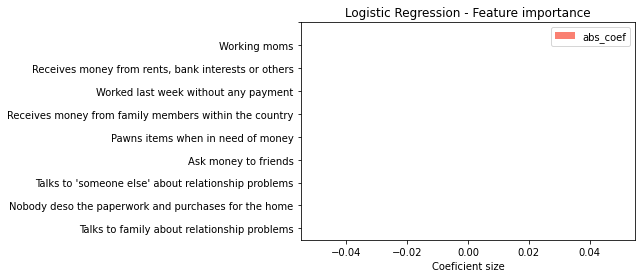

<Figure size 720x1440 with 0 Axes>

In [25]:

ax = imp_features.plot.barh(x='names', y='abs_coef', rot=0, color='salmon')
plt.title('Logistic Regression - Feature importance')
plt.xlabel('Coeficient size')
plt.ylabel('')

plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ['Talks to family about relationship problems', 'Nobody deso the paperwork and purchases for the home',
                                            "Talks to 'someone else' about relationship problems", "Ask money to friends",
                                            "Pawns items when in need of money", "Receives money from family members within the country",
                                            "Worked last week without any payment", "Receives money from rents, bank interests or others", "Working moms"])
plt.figure(figsize=(10, 20))
plt.savefig(plots + '/logit_importance.png')
plt.show()



## Accuracy: Box Plot

In [ ]:
predicted_prob_logit = best_logit.predict_proba(test_features_logit)
predicted_prob_logit = pd.DataFrame(predicted_prob_logit, columns = ['prob0','prob1'])
test_target_pred_logit = test_target_logit.reset_index().join(predicted_prob_logit["prob1"])
test_target_pred_logit["suffers_violence"] = test_target_pred_logit["suffers_violence"].replace(True, 1)

([<matplotlib.axis.XTick at 0x7f3019e7ab10>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

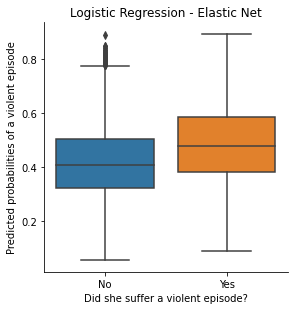

In [ ]:
ax1 = sns.catplot(x="suffers_violence", y="prob1", kind="box", dodge=False, data=test_target_pred_logit,
            height=4)
ax1.set(xlabel='Did she suffer a violent episode?', ylabel='Predicted probabilities of a violent episode',
        title = "Logistic Regression - Elastic Net")
plt.xticks([0, 1], ['No', 'Yes'])

## Accuracy: Prevalence rate estimation

In [ ]:
def bootstrap_prevalence(data, iterations, sample):

  actual = []
  estimate = []
  for iter in range(iterations):
    actual.append(data.sample(sample)["suffers_violence"].mean())
    estimate.append(data.sample(sample)["prob1"].mean())
  prev_est = pd.DataFrame(list(zip(actual, estimate)),
                columns =['actual', 'estimate'])
  prev_est["dif"] = (prev_est["actual"] - prev_est["estimate"])*100
  sum_stats = {"p975": prev_est['dif'].quantile(0.975), 
               "p025": prev_est['dif'].quantile(0.025),
               "mean": prev_est['dif'].mean()}
  return prev_est, sum_stats

In [ ]:
prev_results_logit, results_stats_logit = bootstrap_prevalence(test_target_pred_logit, 5000, 200)

{'p975': 1.839793027538979, 'p025': -12.114648931192052, 'mean': -5.22266813903314}


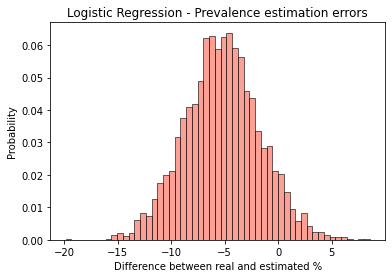

In [ ]:
ax1 = sns.histplot(data=prev_results_logit, x="dif", stat = "probability", discrete = False, color = "salmon")
ax1.set(xlabel='Difference between real and estimated %', title = "Logistic Regression - Prevalence estimation errors")
print(results_stats_logit)

# 2. Decision Tree (Balanced)

## Load data

In [ ]:
db = data_base[['EDAD', 'P2_5', 'P2_6', 'leer_escribir', 'NIV_0.0', 'NIV_10.0', 'NIV_2.0', 'NIV_3.0', 'NIV_4.0', 'NIV_5.0',
            'num_per_hog', 'num_mujeres_hog', 'mujeres_adultas', 'mujeres_no_adultas', 'secundaria_terminada', 
            'P2_10_1.0', 'P2_10_2.0', 'P2_10_3.0', 'P2_10_8.0', 'P2_16_1.0', 'P2_16_2.0', 'P2_16_3.0', 'P2_16_4.0', 'P2_16_5.0', 'P2_16_6.0', 
            'prepa_terminada', 'licenciatura_terminada', 'leer', 'num_indigenas', 'num_trabajadoras', 'num_hombres_hog', 'hombres_adultos', 
            'hombres_no_adultos', 'h_secundaria_terminada', 'h_prepa_terminada', 'h_licenciatura_terminada', 'h_leer', 'h_num_indigenas', 'num_trabajadores', 
            'ocup_simple_h_0.0', 'ocup_simple_h_1.0', 'ocup_simple_h_2.0', 'p_sec_terminada_False', 'p_sec_terminada_True',
            'ocup_simple_h_3.0', 'ocup_simple_h_4.0', 'ocup_simple_h_5.0',
            'ocup_simple_h_6.0', 'ocup_simple_h_0.0', 'ocup_simple_h_1.0', 'ocup_simple_h_2.0',
            'ocup_simple_h_3.0', 'ocup_simple_h_4.0', 'ocup_simple_h_5.0',
            'ocup_simple_h_6.0', 'p_indigena_False', 'p_indigena_True',
            'dif_edad', 'P4AB_1_1.0', 'P4AB_1_2.0', 'P4AB_1_3.0', 'P4AB_1_4.0' , 'P4_1', 'ing_mens_m', 'P4_3', 'ing_mens_h', 'P4_8_1', 'P4_8_2', 'P4_8_3', 'P4_8_4',  
            'PAREN_1', 'PAREN_2', 'PAREN_3', 'PAREN_4', 'PAREN_5', 'PAREN_6', 'PAREN_7', 'PAREN_8', 'PAREN_9', 'P2_9_1.0', 'P2_9_2.0',
            'P4_8_5', 'P4_8_6', 'P4_8_7', 'P4_8_8', 'P4_11', 'P1_2', 'P1_2_A', 'P1_3', 'P1_4_1', 'P1_4_2', 'P1_4_3', 'P1_4_4', 'P1_4_5', 
            'P1_4_6', 'P1_4_7', 'P1_4_8', 'P1_4_9', 'num_per_viv', 'P1_8', 'P15_1_1', 'P15_1_2', 'P15_1_3', 'P15_1_4', 'P15_1_5', 'P15_1_6', 
            'P15_1_7', 'P15_1_8', 'P15_1_9', 'P16_1_1', 'P16_1_2', 'P16_1_3', 'P16_1_4', 'P16_1_5', 'P16_1_6', 'P16_2_1', 'P16_2_2', 'P16_2_3', 
            'P16_2_4', 'P16_2_5', 'P16_2_6', 'asset_1_0.0', 'asset_1_1.0', 'asset_1_2.0', 'asset_1_3.0', 'asset_2_0.0', 'asset_2_1.0', 'asset_2_2.0',
            'asset_2_3.0', 'asset_3_0.0', 'asset_3_1.0', 'asset_3_2.0', 'asset_3_3.0', 'asset_4_0.0', 'asset_4_1.0', 'asset_4_2.0', 'asset_4_3.0',
            'asset_5_0.0', 'asset_5_1.0', 'asset_5_2.0', 'asset_5_3.0', 'asset_6_0.0', 'asset_6_1.0', 'asset_6_2.0', 'asset_6_3.0', 'asset_7_0.0', 'asset_7_1.0',
            'asset_7_2.0', 'asset_7_3.0', 'P1_1_1', 'P1_1_2', 'P1_1_3', 'P1_5_1', 'P1_5_2', 'P1_5_3', 'P1_5_4', 'P1_5_5', 'P1_5_6', 'P1_6_1', 'P1_6_2', 'P1_6_3',
            'P1_6_4', 'P1_6_5', 'P17_1_1_1_1', 'P17_1_1_1_10', 'P17_1_1_1_11', 'P17_1_1_1_12', 'P17_1_1_1_13', 'P17_1_1_1_14', 'P17_1_1_1_15', 'P17_1_1_1_2',
            'P17_1_1_1_3', 'P17_1_1_1_4', 'P17_1_1_1_5', 'P17_1_1_1_6', 'P17_1_1_1_7', 'P17_1_1_1_8', 'P17_1_1_1_9', 'P17_1_2_1_1', 'P17_1_2_1_10', 'P17_1_2_1_11', 
            'P17_1_2_1_12', 'P17_1_2_1_13', 'P17_1_2_1_14', 'P17_1_2_1_15', 'P17_1_2_1_2', 'P17_1_2_1_3', 'P17_1_2_1_4', 'P17_1_2_1_5', 'P17_1_2_1_6', 'P17_1_2_1_7',
            'P17_1_2_1_8', 'P17_1_2_1_9', 'P17_1_3_1_1', 'P17_1_3_1_10', 'P17_1_3_1_11', 'P17_1_3_1_12', 'P17_1_3_1_13', 'P17_1_3_1_14', 'P17_1_3_1_15',
            'P17_1_3_1_2', 'P17_1_3_1_3', 'P17_1_3_1_4', 'P17_1_3_1_5', 'P17_1_3_1_6', 'P17_1_3_1_7', 'P17_1_3_1_8','P17_1_3_1_9', 'P17_1_4_1_1', 'P17_1_4_1_10', 
            'P17_1_4_1_11', 'P17_1_4_1_12', 'P17_1_4_1_13', 'P17_1_4_1_14', 'P17_1_4_1_15', 'P17_1_4_1_2', 'P17_1_4_1_3', 'P17_1_4_1_4', 'P17_1_4_1_5', 'P17_1_4_1_6',
            'P17_1_4_1_7', 'P17_1_4_1_8', 'P17_1_4_1_9', 'P17_1_5_1_1', 'P17_1_5_1_10', 'P17_1_5_1_11', 'P17_1_5_1_12', 'P17_1_5_1_13', 'P17_1_5_1_14', 'P17_1_5_1_15',
            'P17_1_5_1_2', 'P17_1_5_1_3', 'P17_1_5_1_4', 'P17_1_5_1_5', 'P17_1_5_1_6', 'P17_1_5_1_7', 'P17_1_5_1_8', 'P17_1_5_1_9', 'P17_1_6_1_1', 'P17_1_6_1_10',
            'P17_1_6_1_11', 'P17_1_6_1_12', 'P17_1_6_1_13', 'P17_1_6_1_14', 'P17_1_6_1_15', 'P17_1_6_1_2', 'P17_1_6_1_3', 'P17_1_6_1_4', 'P17_1_6_1_5','P17_1_6_1_6',
            'P17_1_6_1_7', 'P17_1_6_1_8', 'P17_1_6_1_9', 'P17_1_7_1_1', 'P17_1_7_1_10', 'P17_1_7_1_11', 'P17_1_7_1_12', 'P17_1_7_1_13', 'P17_1_7_1_14', 'P17_1_7_1_15',
            'P17_1_7_1_2','P17_1_7_1_3', 'P17_1_7_1_4', 'P17_1_7_1_5', 'P17_1_7_1_6', 'P17_1_7_1_7', 'P17_1_7_1_8', 'P17_1_7_1_9', 'P4_6_AB_1.0', 'P4_6_AB_2.0', 'P4_6_AB_3.0',
             'P16_3_1_1_1', 'P16_3_1_1_2', 'P16_3_1_1_3', 'P16_3_1_1_4', 'P16_3_1_1_5', 'P16_3_1_1_6', 'P16_3_2_1_1', 'P16_3_2_1_2', 'P16_3_2_1_3', 'P2_11_1.0', 'P2_11_2.0',
            'P16_3_2_1_4', 'P16_3_2_1_5', 'P16_3_2_1_6', 'P16_3_3_1_1', 'P16_3_3_1_2', 'P16_3_3_1_3', 'P16_3_3_1_4', 'P16_3_3_1_5', 'P16_3_3_1_6', 'P16_3_4_1_1',
            'P16_3_4_1_2', 'P16_3_4_1_3', 'P16_3_4_1_4', 'P16_3_4_1_5', 'P16_3_4_1_6', 'P16_3_5_1_1', 'P16_3_5_1_2', 'P16_3_5_1_3', 'P16_3_5_1_4', 'P16_3_5_1_5',
            'P16_3_5_1_6', 'P16_3_6_1_1', 'P16_3_6_1_2', 'P16_3_6_1_3', 'P16_3_6_1_4', 'P16_3_6_1_5', 'P16_3_6_1_6', 'suffers_violence', 
            'max_educativo_0.0', 'max_educativo_10.0', 'max_educativo_2.0', 'max_educativo_3.0', 'max_educativo_4.0', 'max_educativo_5.0', 'p_trabaja_False', 'p_trabaja_True',
            'ocup_simple_m_0.0', 'ocup_simple_m_1.0', 'ocup_simple_m_2.0', 'ocup_simple_m_3.0', 'ocup_simple_m_4.0', 'ocup_simple_m_5.0', 'ocup_simple_m_6.0', 
            'p_licenciatura_terminada_False', 'p_licenciatura_terminada_True', 'p_prepa_terminada_False', 'p_prepa_terminada_True']]

In [ ]:
df_train, df_test = train_test_split(db, test_size=0.2, random_state=1)
train_features = df_train.drop(columns = ['suffers_violence'])
train_target = df_train['suffers_violence']
test_target = df_test['suffers_violence']
test_features = df_test.drop(columns = ['suffers_violence'])

In [ ]:
hyperparameters =  {'criterion': ['gini', 'entropy'], 'max_depth':[10, 20, 30], 'min_samples_split':[1000, 3000]}

grid_tree = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0, class_weight = 'balanced'),
             param_grid=hyperparameters,
             cv=10,
             return_train_score=True,
             scoring=['accuracy', 'recall', 'precision'],
             refit='recall')

#Fitting the model
grid_tree.fit(train_features, train_target)
tree_model_y_hat = grid_tree.predict(test_features)

#Results
model_results = pd.DataFrame(grid_tree.cv_results_)
ranked_model = model_results.sort_values(by=['rank_test_recall'])
ranked_model[['param_criterion', 'param_max_depth', 'param_min_samples_split',
              'mean_test_recall', 'mean_test_accuracy']]


,param_criterion,param_max_depth,param_min_samples_split,mean_test_recall,mean_test_accuracy
4,gini,30,1000,0.567183,0.576505
10,entropy,30,1000,0.564182,0.576985
3,gini,20,3000,0.563613,0.577003
5,gini,30,3000,0.563613,0.577003
2,gini,20,1000,0.562440,0.577792
9,entropy,20,3000,0.562003,0.577123
11,entropy,30,3000,0.562003,0.577123
8,entropy,20,1000,0.558569,0.578564
1,gini,10,3000,0.550647,0.580229
7,entropy,10,3000,0.548123,0.580966


## Graph

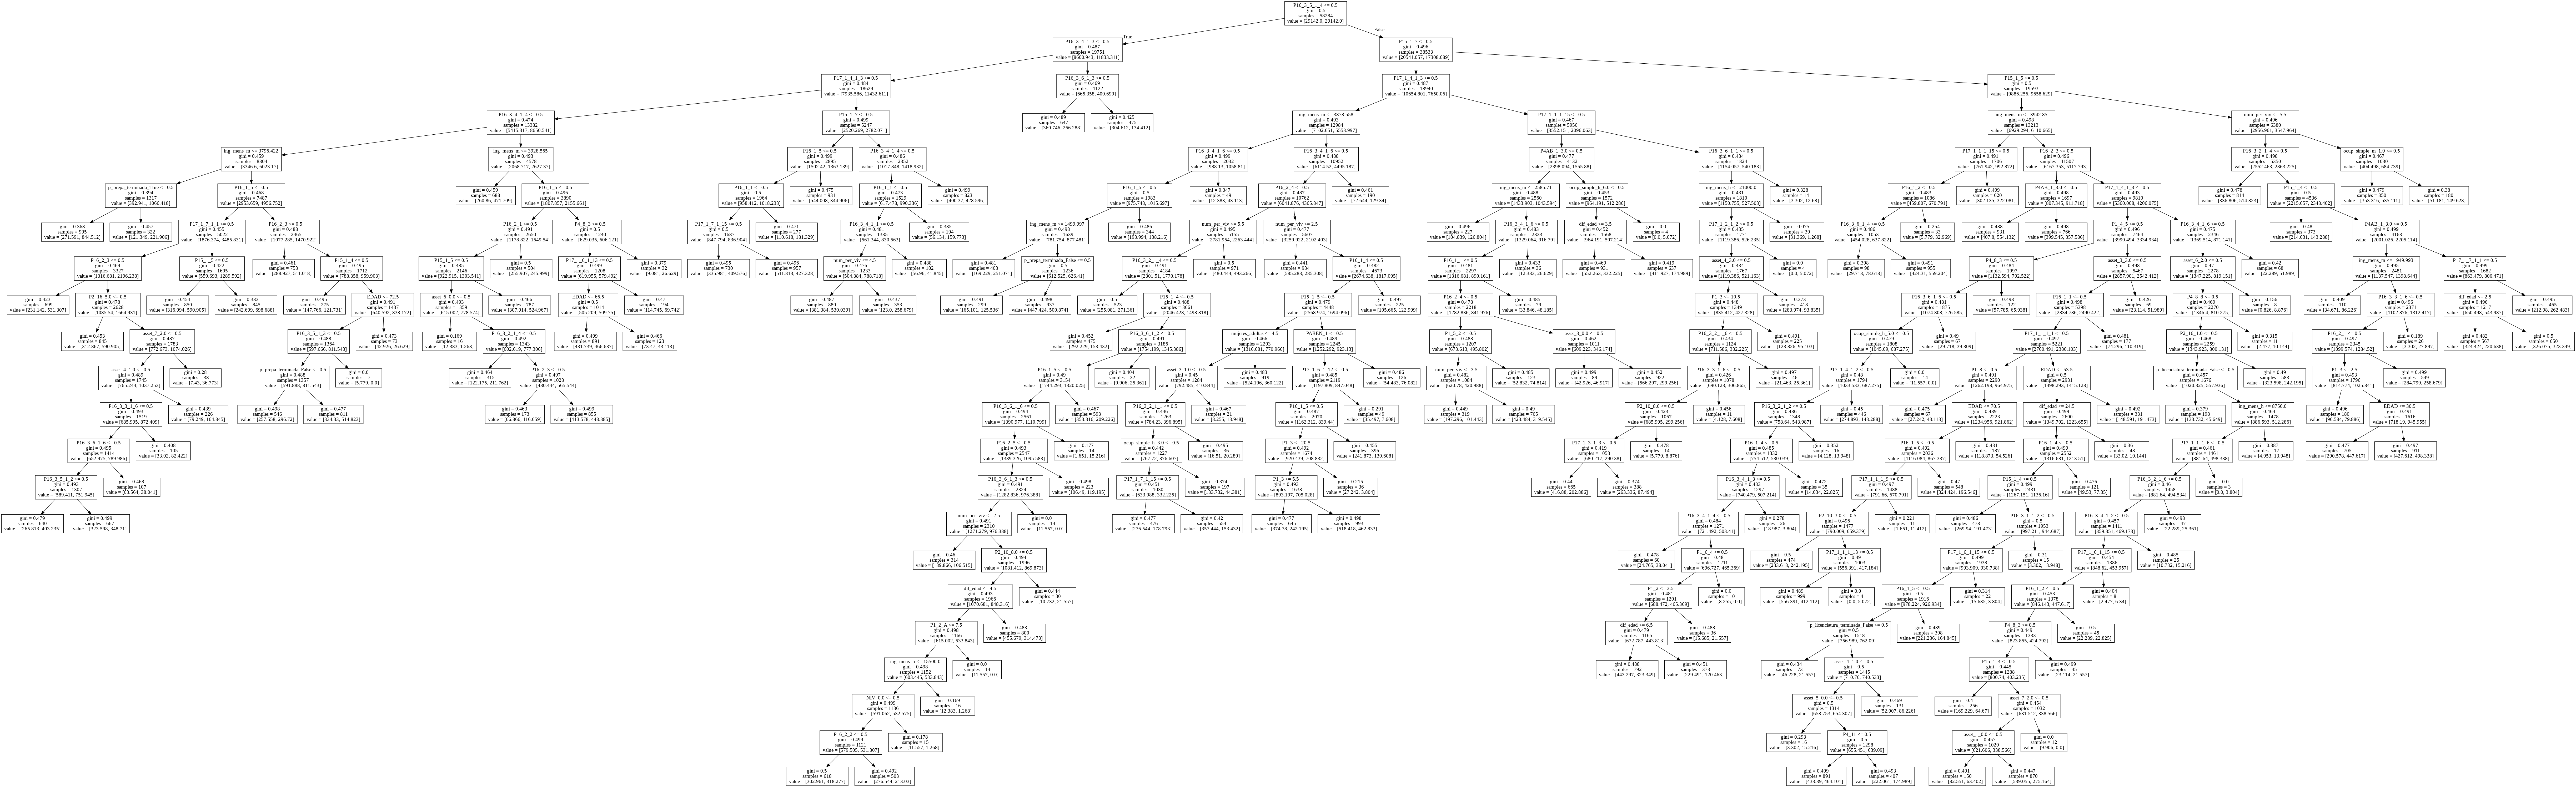

In [ ]:
from sklearn import tree
import pydotplus
from IPython.display import Image
import graphviz
from graphviz import Source
from sklearn import tree

col_names = db.drop(columns='suffers_violence').columns
graph = Source(tree.export_graphviz(grid_tree.best_estimator_, out_file=None, feature_names=col_names))
graph.format = 'png'
graph.render('dtree_render',view=True)
Image("dtree_render.png")

## Best estimator scoring metrics

In [ ]:
best_tree = grid_tree.best_estimator_
y_predicted_tree = grid_tree.best_estimator_.predict(test_features)
print(grid_tree.best_params_)
print(classification_report(test_target, y_predicted_tree))

{'criterion': 'gini', 'max_depth': 30, 'min_samples_split': 1000}
              precision    recall  f1-score   support

       False       0.68      0.55      0.61      8847
        True       0.46      0.60      0.52      5724

    accuracy                           0.57     14571
   macro avg       0.57      0.58      0.57     14571
weighted avg       0.60      0.57      0.58     14571



## Feature importance

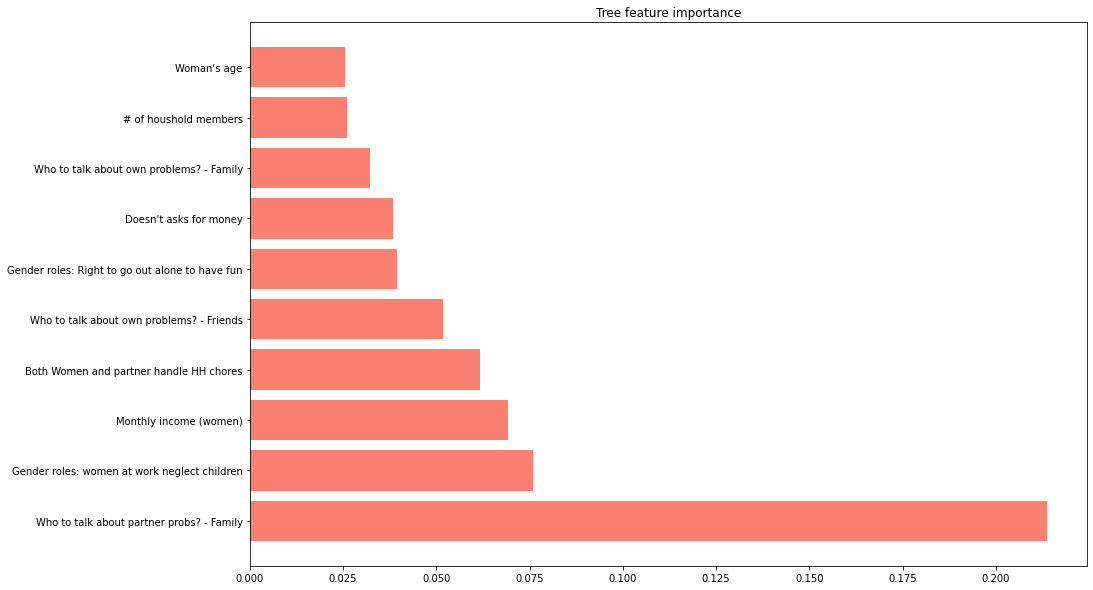

In [ ]:
col_names = db.drop(columns='suffers_violence').columns
# Get feature importances
importances = grid_tree.best_estimator_.feature_importances_

# Sort in descending order
indices = np.argsort(importances)[::-1]

# Sort the labels in a corresponding fashion
names = [col_names[i] for i in indices]

# Plot
plt.figure(figsize=(15, 10))
plt.barh(range(train_features[names[:10]].shape[1]),importances[indices[:10]], color='salmon')
#plt.yticks(range(train_features[names[:10]].shape[1]), names[:10])
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ['Who to talk about partner probs? - Family', 'Gender roles: women at work neglect children', 'Monthly income (women)', 'Both Women and partner handle HH chores', 
                                           'Who to talk about own problems? - Friends', 'Gender roles: Right to go out alone to have fun', "Doesn't asks for money", "Who to talk about own problems? - Family",
                                            '# of houshold members', "Woman's age"])
plt.title('Tree feature importance')
plt.savefig(plots + '/tree_importance.png')
plt.show()

#3. Decision Tree (Regular)

In [ ]:
hyper_dtib =  {'criterion': ['gini', 'entropy'], 'max_depth':[10, 20, 30], 'min_samples_split':[1000, 3000]}

grid_tree_ib = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid=hyper_dtib,
             cv=10,
             return_train_score=True,
             scoring=['accuracy', 'recall', 'precision'],
             refit='recall')

#Fitting the model
grid_tree_ib.fit(train_features, train_target)
#tree_model_y_hat = grid_tree_ib.predict(test_features)

#Results
model_results_treeib = pd.DataFrame(grid_tree_ib.cv_results_)
ranked_model_tib = model_results_treeib.sort_values(by=['rank_test_recall'])
ranked_model_tib[['param_criterion', 'param_max_depth', 'param_min_samples_split',
              'mean_test_recall', 'mean_test_accuracy']]


,param_criterion,param_max_depth,param_min_samples_split,mean_test_recall,mean_test_accuracy
4,gini,30,1000,0.279959,0.616310
2,gini,20,1000,0.279306,0.616430
10,entropy,30,1000,0.274955,0.616172
8,entropy,20,1000,0.274128,0.616447
0,gini,10,1000,0.250413,0.618008
6,entropy,10,1000,0.246714,0.619295
3,gini,20,3000,0.212341,0.616567
5,gini,30,3000,0.212341,0.616567
1,gini,10,3000,0.210992,0.616756
9,entropy,20,3000,0.204553,0.616361


In [ ]:
from sklearn import tree
import pydotplus
from IPython.display import Image
import graphviz
from graphviz import Source
from sklearn import tree

col_names = db.drop(columns='suffers_violence').columns
graph = Source(tree.export_graphviz(grid_tree_ib.best_estimator_, out_file=None, feature_names=col_names))
graph.format = 'png'
graph.render('dtreeif_render',view=True)
Image("dtreeib_render.png")

In [ ]:
best_tree = grid_tree.best_estimator_
y_predicted_tree = grid_tree.best_estimator_.predict(test_features)
print(grid_tree.best_params_)
print(classification_report(test_target, y_predicted_tree))

{'criterion': 'gini', 'max_depth': 30, 'min_samples_split': 1000}
              precision    recall  f1-score   support

       False       0.68      0.55      0.61      8847
        True       0.46      0.60      0.52      5724

    accuracy                           0.57     14571
   macro avg       0.57      0.58      0.57     14571
weighted avg       0.60      0.57      0.58     14571



In [ ]:
col_names = db.drop(columns='suffers_violence').columns
# Get feature importances
importances = grid_tree.best_estimator_.feature_importances_

# Sort in descending order
indices = np.argsort(importances)[::-1]

# Sort the labels in a corresponding fashion
names = [col_names[i] for i in indices]

# Plot
plt.figure(figsize=(15, 20))
plt.barh(range(train_features[names[:10]].shape[1]),importances[indices[:10]], color='salmon')
#plt.yticks(range(train_features[names[:10]].shape[1]), names[:10])
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ['Who to talk about partner probs? - Family', 'Gender roles: women at work neglect children', 'Monthly income (women)', 'Both Women and partner handle HH chores', 
                                           'Who to talk about own problems? - Friends', 'Gender roles: Right to go out alone to have fun', "Doesn't asks for money", "Who to talk about own problems? - Family",
                                            '# of houshold members', "Woman's age"])
plt.title('Tree feature importance')
plt.savefig(plots + '/tree_importance.png')
plt.show()

## Accuracy: box plot

In [ ]:
predicted_prob = grid_tree.predict_proba(test_features)
predicted_prob = pd.DataFrame(predicted_prob, columns = ['prob0','prob1'])
test_target_pred = test_target.reset_index().join(predicted_prob["prob1"])
test_target_pred["suffers_violence"] = test_target_pred["suffers_violence"].replace(True, 1)

([<matplotlib.axis.XTick at 0x7f301a2b4bd0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

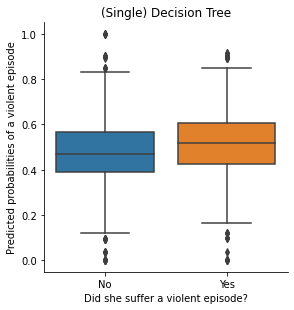

In [ ]:
ax1 = sns.catplot(x="suffers_violence", y="prob1", kind="box", dodge=False, data=test_target_pred,
            height=4)
ax1.set(xlabel='Did she suffer a violent episode?', ylabel='Predicted probabilities of a violent episode',
        title = "(Single) Decision Tree")
plt.xticks([0, 1], ['No', 'Yes'])

## Accuracy: prevalence rate estimation

In [ ]:
prev_results_dt, results_stats_dt = bootstrap_prevalence(test_target_pred, 5000, 200)

{'p975': -3.2217985198361334, 'p025': -16.959775843340523, 'mean': -9.988057221268377}


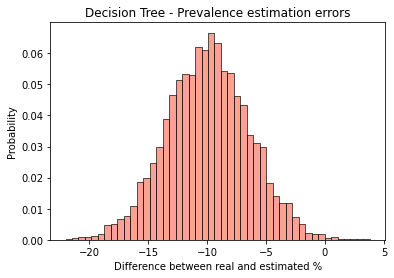

In [ ]:
ax1 = sns.histplot(data=prev_results, x="dif", stat = "probability", discrete = False, color = "salmon")
ax1.set(xlabel='Difference between real and estimated %', title = "Decision Tree - Prevalence estimation errors")
print(results_stats_dt)

# 4. Random Forest (Balanced)

In [ ]:
param_rf = {'n_estimators' : [100], 'criterion': ['gini', 'entropy'], 
            'max_depth' : [10, 20, 30], 'min_samples_split': [100, 500, 1000, 3000]}
est_rf = RandomForestClassifier(class_weight='balanced')
k = 10
grid_random = GridSearchCV(estimator=est_rf, 
                         param_grid=param_rf, 
                         scoring=['accuracy', 'precision', 'recall'], 
                         cv=k,
                         refit='recall',
                        return_train_score=True)
grid_random.fit(train_features, train_target)

In [ ]:
y_rf_pred = grid_random.predict(test_features)
search_rf = pd.DataFrame(grid_random.cv_results_) 
sort_search_rf = search_rf.sort_values(by=['rank_test_accuracy'])
sort_search_rf[['mean_fit_time', 'mean_score_time', 'param_criterion', 'param_max_depth', 'mean_test_accuracy', 
               'mean_test_precision', 'mean_test_recall', 'param_min_samples_split']]

,mean_fit_time,mean_score_time,param_criterion,param_max_depth,mean_test_accuracy,mean_test_precision,mean_test_recall,param_min_samples_split
4,13.089212,0.228245,gini,20,0.616825,0.513742,0.530459,100
20,15.280173,0.241311,entropy,30,0.616207,0.513192,0.522801,100
8,13.802830,0.232573,gini,30,0.615709,0.512404,0.527327,100
16,13.789031,0.231730,entropy,20,0.615366,0.512030,0.523280,100
0,8.285392,0.169839,gini,10,0.612021,0.507793,0.525107,100
12,8.123881,0.161881,entropy,10,0.611317,0.506924,0.526152,100
1,7.460832,0.159573,gini,10,0.609533,0.504659,0.536334,500
5,9.796804,0.180362,gini,20,0.607989,0.502626,0.559265,500
9,9.845513,0.177992,gini,30,0.607886,0.502516,0.559395,500
17,10.384329,0.184799,entropy,20,0.607834,0.502483,0.554217,500


In [ ]:
best_model = grid_random.best_estimator_
print(grid_random.best_params_)
y_predicted = best_model.predict(test_features)
print(classification_report(test_target, y_predicted))

{'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 1000, 'n_estimators': 100}
              precision    recall  f1-score   support

       False       0.69      0.64      0.66      8847
        True       0.50      0.55      0.52      5724

    accuracy                           0.60     14571
   macro avg       0.59      0.60      0.59     14571
weighted avg       0.61      0.60      0.61     14571



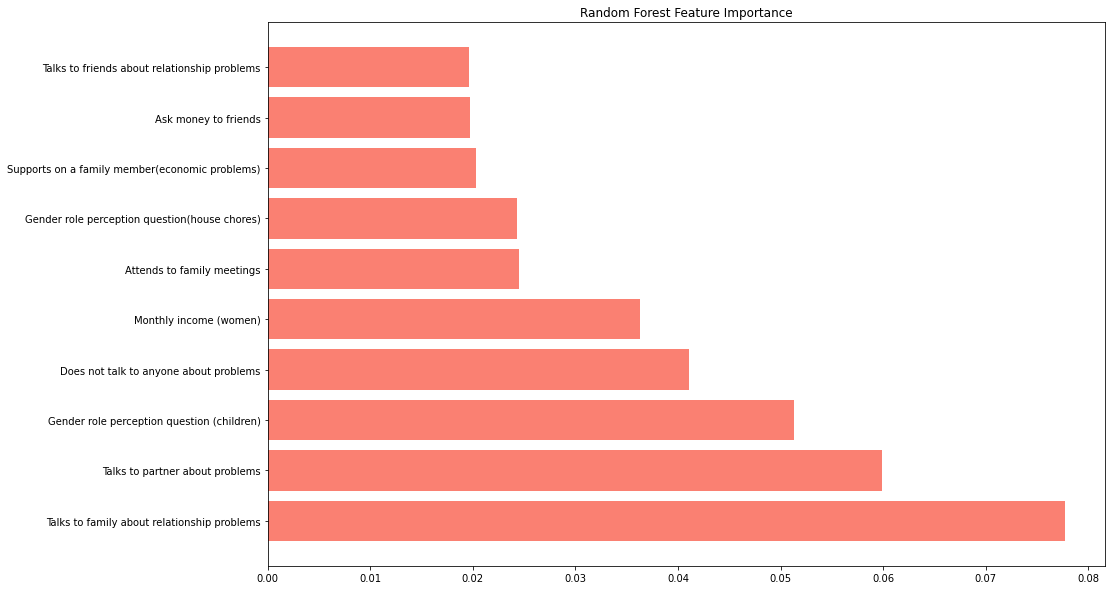

In [ ]:
# Get feature importances
importances = grid_random.best_estimator_.feature_importances_

# Sort in descending order
indices = np.argsort(importances)[::-1]

# Sort the labels in a corresponding fashion
names = [train_features.columns.values[i] for i in indices]

# Plot
plt.figure(figsize=(15, 10))
plt.barh(range(test_features[names[:10]].shape[1]),importances[indices[:10]], color='salmon')
#plt.xticks(range(test_features[names[:10]].shape[1]), names[:10], rotation=90)
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ['Talks to family about relationship problems', 'Talks to partner about problems', 'Gender role perception question (children)',
                                            'Does not talk to anyone about problems', 'Monthly income (women)', 'Attends to family meetings',
                                            'Gender role perception question(house chores)', 'Supports on a family member(economic problems)', 
                                            'Ask money to friends', 'Talks to friends about relationship problems'])
plt.title('Random Forest Feature Importance')
plt.savefig(plots + '/rf_importance.png')
plt.show()

# 5. Random Forest (Regular)

In [ ]:
#param_rf = {'n_estimators' : [100], 'criterion': ['gini', 'entropy'], 
#            'max_depth' : [10, 20, 30], 'min_samples_split': [100, 500, 1000, 3000]}
est_rfib = RandomForestClassifier()
k = 10
grid_random_ib = GridSearchCV(estimator=est_rfib, 
                         param_grid=param_rf, 
                         scoring=['accuracy', 'precision', 'recall'], 
                         cv=k,
                         refit='recall',
                        return_train_score=True)
grid_random_ib.fit(train_features, train_target)

In [ ]:
y_rf_pred = grid_random.predict(test_features)
search_rf = pd.DataFrame(grid_random.cv_results_) 
sort_search_rf = search_rf.sort_values(by=['rank_test_accuracy'])
sort_search_rf[['mean_fit_time', 'mean_score_time', 'param_criterion', 'param_max_depth', 'mean_test_accuracy', 
               'mean_test_precision', 'mean_test_recall', 'param_min_samples_split']]

## Graphing Precision - Recall Curve

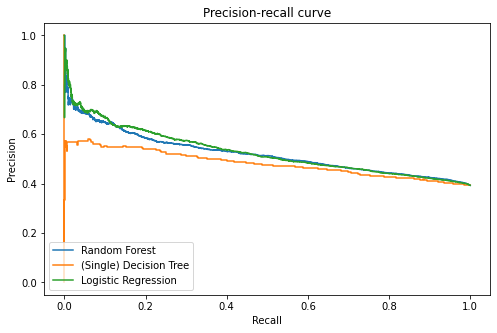

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
disp_rf = plot_precision_recall_curve(grid_random.best_estimator_, test_features, test_target, ax=ax, label="Random Forest Balanced")
disp =  plot_precision_recall_curve(best_tree, test_features, test_target, ax=ax, label="(Single) Decision Tree Balanced")
disp_logit =  plot_precision_recall_curve(best_logit, test_features_logit, test_target_logit, ax=ax, label="Logistic Regression")
plt.title("Precision-recall curve")
plt.savefig(plots + '/Precision-recall.png')
plt.show()

In [ ]:
predicted_prob_r = grid_random.predict_proba(test_features)
predicted_prob_r = pd.DataFrame(predicted_prob_r, columns = ['prob0','prob1'])
test_target_pred_r = test_target.reset_index().join(predicted_prob_r["prob1"])
test_target_pred_r["suffers_violence"] = test_target_pred_r["suffers_violence"].replace(True, 1)

([<matplotlib.axis.XTick at 0x7f301a1f0450>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

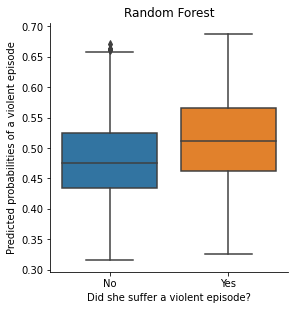

In [ ]:
ax1 = sns.catplot(x="suffers_violence", y="prob1", kind="box", dodge=False, data=test_target_pred_r,
            height=4)
ax1.set(xlabel='Did she suffer a violent episode?', ylabel='Predicted probabilities of a violent episode',
        title = "Random Forest")
plt.xticks([0, 1], ['No', 'Yes'])

In [ ]:
prev_results_rf, results_stats_rf = bootstrap_prevalence(test_target_pred_r, 5000, 200)

{'p975': -3.136400543797164, 'p025': -16.960477099415527, 'mean': -10.222704480575642}


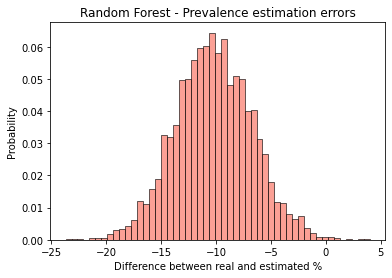

In [ ]:
ax1 = sns.histplot(data=prev_results_rf, x="dif", stat = "probability", discrete = False, color = "salmon")
ax1.set(xlabel='Difference between real and estimated %', title = "Random Forest - Prevalence estimation errors")
print(results_stats_rf)

## 3. PCA

In [ ]:
#Normalization of features
features_pca = db.drop(columns='suffers_violence')

def normalize_cols(dataframe, cols):

  for col in cols:
    dataframe[col] = (dataframe[col] - dataframe[col].mean()) / dataframe[col].std()

cols_to_normalize = ['P1_2', 'P1_3', 'EDAD', 'ing_mens_h', 'ing_mens_m', 'num_per_hog','num_mujeres_hog', 'mujeres_adultas', 'mujeres_no_adultas', 'num_indigenas', 
           'num_trabajadoras', 'num_hombres_hog', 'hombres_adultos', 'hombres_no_adultos', 'h_num_indigenas', 'num_trabajadores', 'dif_edad', 'ing_mens_m', 'ing_mens_h', 
           'num_per_viv']


normalize_cols(features_pca, cols_to_normalize)

In [ ]:
#Graph explained variance
def scree_plot(pca_obj):
    """
    Create scree plot for PCA. 
    :param pca_obj: sklearn.decomposition.PCA object
    :return:
    """
    sns.lineplot(x=range(1, pca_obj.n_components+1), y=pca_obj.explained_variance_ratio_)
    plt.xlabel("Principal component number")
    plt.ylabel("Variance explained")
    plt.title("Scree plot for PCA")

#pca = PCA(n_components = 40)
pca = PCA(n_components = 10, svd_solver='full')
principalComponents = pca.fit(features_pca.T)
scree_plot(pca)

In [ ]:
#Get features correlation to pca vectors

main_components = pca.components_

def corr_matrix(features, pca_components):
  cols = ["PCA_VECTOR_" + str(i+1) for i in range(len(pca_components))]
  results = pd.DataFrame(columns=cols)
  
  for i in features:
        variable = features.loc[:, i].values
        row = []
        for pc_vector in pca_components:
            row.append(np.corrcoef(pc_vector, variable)[0][1])
        serie = pd.Series(row, index = results.columns)
        results = results.append(serie, ignore_index=True)
        
  names = pd.DataFrame({'names_features': col_names})
  results = pd.concat([results, names], axis=1)
  results.set_index('names_features', inplace=True)
  return results

pca_matrix = corr_matrix(features_pca, main_components)
ordered = pca_matrix[pca_matrix > 0.4]
ordered = ordered[ordered.PCA_VECTOR_1.notnull() | ordered.PCA_VECTOR_2.notnull()]
ordered.sort_values(by = 'PCA_VECTOR_1')

3.1 Clustering

In [ ]:
#Sample for clustering
#!pip install kmodes
from kmodes.kmodes import KModes

db['suffers_violence'] = db['suffers_violence'].astype(int)
features_target = pd.concat([features_pca, db['suffers_violence']], axis=1)
sample_target = features_target.sample(frac=0.50, replace=True, random_state=1)
sample = sample_target[:]
sample.drop(columns='suffers_violence', inplace= True)
clustering = KModes(n_clusters=2, init='Huang', n_init=5, verbose=1)
y_pred_clustering = clustering.fit_predict(sample[['P2_5','PAREN', 'p_licenciatura_terminada','dif_edad']])
sample_target['label'] = y_pred_clustering
sample_target = sample_target[sample_target['label'] != -1]

In [ ]:
#Table of distribution
proportions = pd.DataFrame()
proportions['Not Suffers Violence'] = sample_target[sample_target['suffers_violence']== 0 ]['label'].value_counts()/len(sample_target[sample_target['suffers_violence']== 0 ])
proportions['Suffers Violence'] = sample_target[sample_target['suffers_violence']== 1 ]['label'].value_counts()/len(sample_target[sample_target['suffers_violence']== 1 ])
proportions